In [48]:
# !pip install quandl

In [82]:
import quandl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

import warnings
warnings.filterwarnings('ignore')

In [83]:
df = quandl.get("BSE/SENSEX", api_key = 'yA9xSn4eNsCXebcYZc-F')
a = df.Close.min()
b = df.Close.max()

In [84]:
df = df[["Close"]]
df.head()

,Close
Date,
1979-04-03,124.15
1979-04-04,122.85
1979-04-06,123.52
1979-04-07,124.18
1979-04-09,124.30


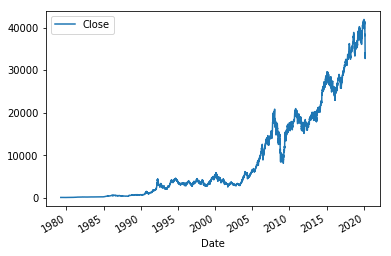

In [85]:
df.plot()

In [86]:
lag = 50

df['Predicted'] = df[['Close']].shift(-lag)

X = np.array(df.drop(["Predicted"],1))[:-lag]
y = np.array(df['Predicted'])[:-lag]

sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
y = sc.fit_transform(y.reshape(-1,1))

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

### ML Models

In [88]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression().fit(X_train,y_train)
model1.score(X_test,y_test)

0.9898125149321187

In [89]:
model2 = SVR(kernel='rbf', C=10000, gamma=0.0001).fit(X_train,y_train)
model2.score(X_test,y_test)

0.9866918366499972

In [90]:
model3 = DecisionTreeRegressor().fit(X_train,y_train)
model3.score(X_test,y_test)

0.9840485501447378

In [91]:
model4 = RandomForestRegressor().fit(X_train,y_train)
model4.score(X_test,y_test)

0.9872909616474855

In [92]:
model5 = GradientBoostingRegressor().fit(X_train,y_train)
model5.score(X_test,y_test)

0.9914019146234064

### LSTMs

In [93]:
data = sc.fit_transform(df.values)

In [94]:
train_size = int(len(data) * 0.80)

train_data = data[:train_size , :]
test_data = data[train_size: , :]


In [95]:
def create_dataset(dataset, lag=50):
    dataX, dataY = [], []
    for i in range(len(dataset)-lag-1):
        a = dataset[i:(i+lag), 0]
        dataX.append(a)
        dataY.append(dataset[i + lag, 0])
    return np.array(dataX), np.array(dataY)

In [96]:
lag = 50
X_train, y_train = create_dataset(train_data, lag)
X_test, y_test = create_dataset(test_data, lag)

In [97]:
model6 = LinearRegression().fit(X_train,y_train)
model6.score(X_test,y_test)                                  

0.9983021176958123

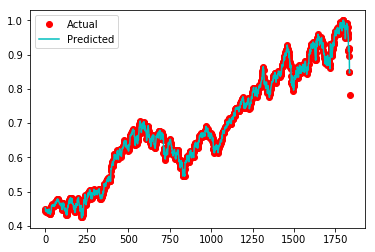

In [132]:
y_pred6 = model6.predict(X_test)
plt.plot(y_test,'ro',label="Actual")
plt.plot(y_pred6,'c',label="Predicted")
plt.legend()

In [67]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [68]:
model = Sequential()

model.add(LSTM(input_dim=lag,output_dim=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(100,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(output_dim=1))

model.compile(loss='mse', optimizer='adam')
model.fit(X_train,y_train,batch_size=128,nb_epoch=10,validation_split=0.05)

Train on 7122 samples, validate on 375 samples
Epoch 1/10
7122/7122 [==============================] - 2s 293us/step - loss: 0.0052 - val_loss: 6.8995e-04
Epoch 2/10
7122/7122 [==============================] - 1s 94us/step - loss: 4.8765e-04 - val_loss: 3.4269e-04
Epoch 3/10
7122/7122 [==============================] - 1s 87us/step - loss: 4.4625e-04 - val_loss: 5.6650e-04
Epoch 4/10
7122/7122 [==============================] - 1s 90us/step - loss: 3.7819e-04 - val_loss: 2.6560e-04
Epoch 5/10
7122/7122 [==============================] - 1s 84us/step - loss: 3.4860e-04 - val_loss: 2.4166e-04
Epoch 6/10
7122/7122 [==============================] - 1s 85us/step - loss: 3.1551e-04 - val_loss: 3.1572e-04
Epoch 7/10
7122/7122 [==============================] - 1s 86us/step - loss: 2.8986e-04 - val_loss: 2.2327e-04
Epoch 8/10
7122/7122 [==============================] - 1s 91us/step - loss: 2.7519e-04 - val_loss: 2.8370e-04
Epoch 9/10
7122/7122 [==============================] - 1s 88us/step

In [69]:
y_pred = model.predict(X_test)

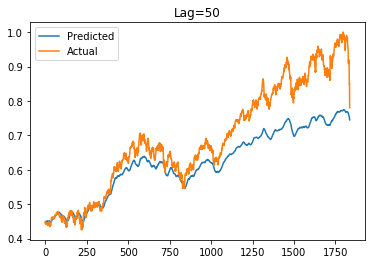

In [134]:
plt.plot(y_pred,label="Predicted")
plt.plot(y_test,label="Actual")
plt.title("Lag=50")
plt.legend()

In [71]:
lag = 1
X_train1, y_train1 = create_dataset(train_data, lag)
X_test1, y_test1 = create_dataset(test_data, lag)

X_train1 = np.reshape(X_train1, (X_train1.shape[0], 1, X_train1.shape[1]))
X_test1 = np.reshape(X_test1, (X_test1.shape[0], 1, X_test1.shape[1]))

In [72]:
model1 = Sequential()

model1.add(LSTM(input_dim=lag,output_dim=50,return_sequences=True))
model1.add(Dropout(0.2))

model1.add(LSTM(100,return_sequences=False))
model1.add(Dropout(0.2))

model1.add(Dense(output_dim=1))

model1.compile(loss='mse', optimizer='adam')
model1.fit(X_train1,y_train1,batch_size=128,nb_epoch=10,validation_split=0.05)

Train on 7168 samples, validate on 378 samples
Epoch 1/10
7168/7168 [==============================] - 2s 286us/step - loss: 0.0128 - val_loss: 0.0345
Epoch 2/10
7168/7168 [==============================] - 1s 82us/step - loss: 0.0015 - val_loss: 7.8037e-05
Epoch 3/10
7168/7168 [==============================] - 1s 83us/step - loss: 2.0037e-04 - val_loss: 3.0859e-05
Epoch 4/10
7168/7168 [==============================] - 1s 84us/step - loss: 1.8962e-04 - val_loss: 2.8704e-05
Epoch 5/10
7168/7168 [==============================] - 1s 83us/step - loss: 1.6688e-04 - val_loss: 5.3109e-05
Epoch 6/10
7168/7168 [==============================] - 1s 90us/step - loss: 1.7108e-04 - val_loss: 3.1183e-05
Epoch 7/10
7168/7168 [==============================] - 1s 83us/step - loss: 1.6501e-04 - val_loss: 2.9585e-05
Epoch 8/10
7168/7168 [==============================] - 1s 87us/step - loss: 1.6850e-04 - val_loss: 2.7633e-05TA: 0s - loss: 1.7417
Epoch 9/10
7168/7168 [==============================] -

In [73]:
y_pred1 = model1.predict(X_test1)

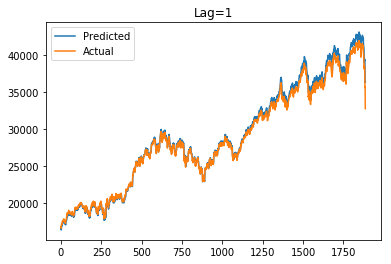

In [135]:
plt.plot(y_pred1*(b-a)+a,label="Predicted")
plt.plot(y_test1*(b-a)+a,label="Actual")
plt.title("Lag=1")
plt.legend()